In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df = pd.read_csv('Churn_Modelling.csv')  # adjust path if needed


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


C:\Users\Gurudeep\AppData\Local\Temp\ipykernel_16968\2474482751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='viridis')


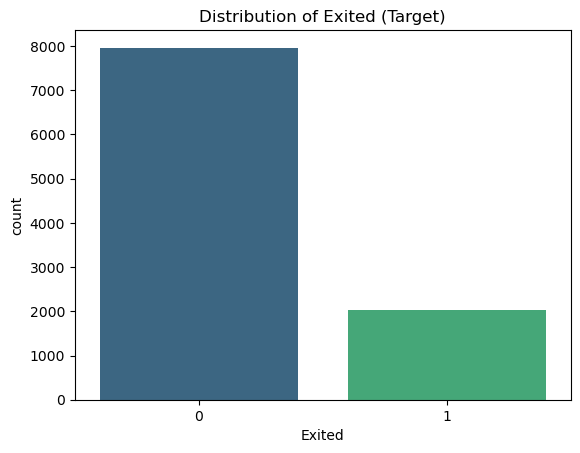

In [30]:
# Distribution of 'Exited' (target)
sns.countplot(x='Exited', data=df, palette='viridis')
plt.title("Distribution of Exited (Target)")
plt.show()


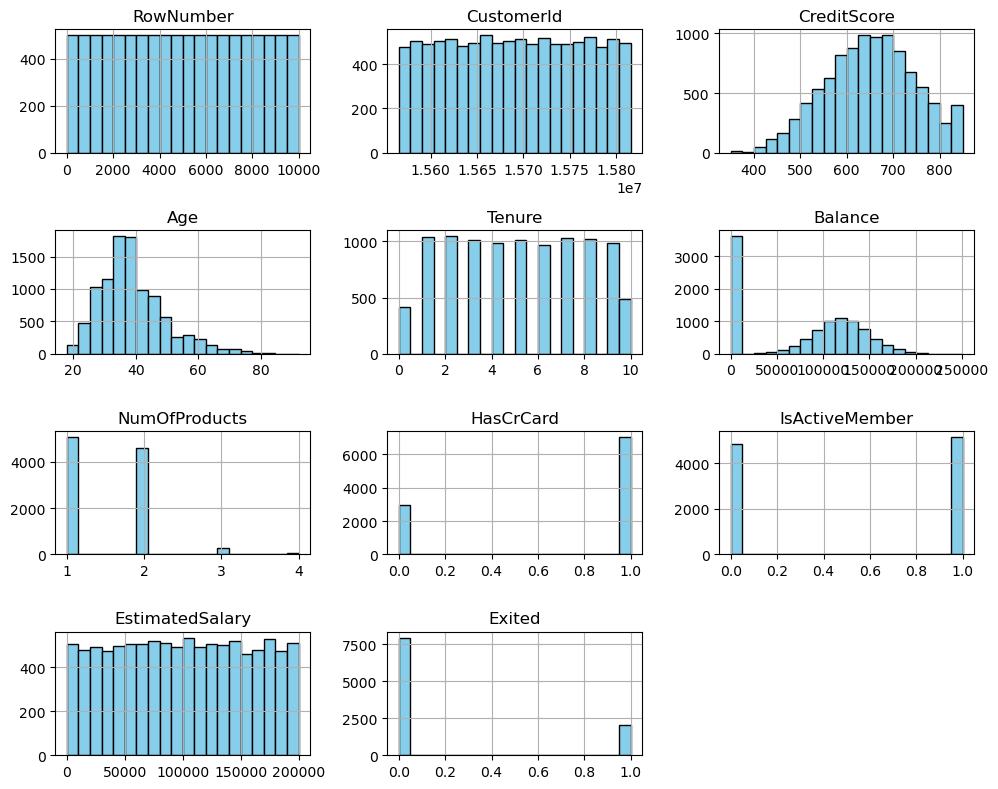

In [31]:
# Histograms for numerical features
df.hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


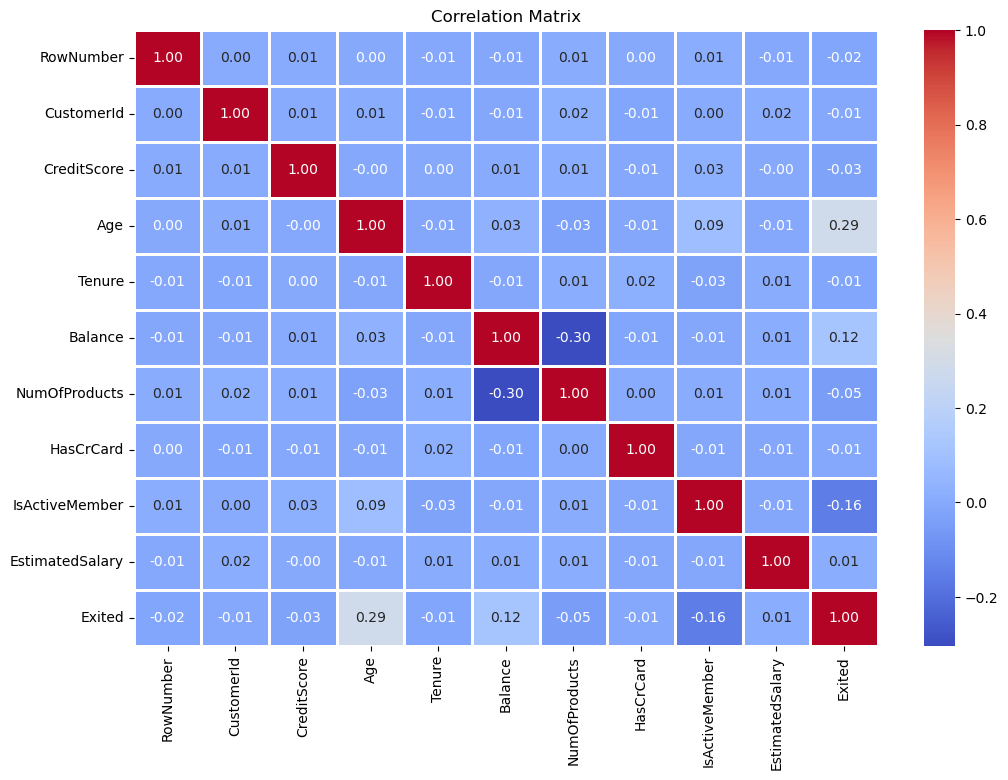

In [32]:
# Correlation Matrix for numeric features
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title("Correlation Matrix")
plt.show()


C:\Users\Gurudeep\AppData\Local\Temp\ipykernel_16968\3400763653.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=col, data=df, palette='coolwarm')


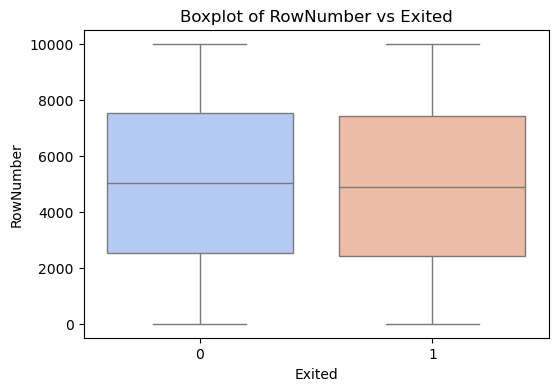

C:\Users\Gurudeep\AppData\Local\Temp\ipykernel_16968\3400763653.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=col, data=df, palette='coolwarm')


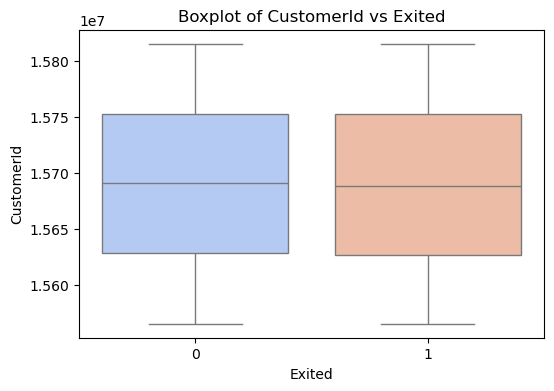

C:\Users\Gurudeep\AppData\Local\Temp\ipykernel_16968\3400763653.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=col, data=df, palette='coolwarm')


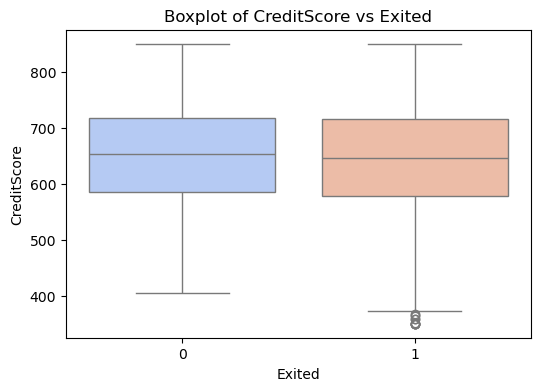

C:\Users\Gurudeep\AppData\Local\Temp\ipykernel_16968\3400763653.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=col, data=df, palette='coolwarm')


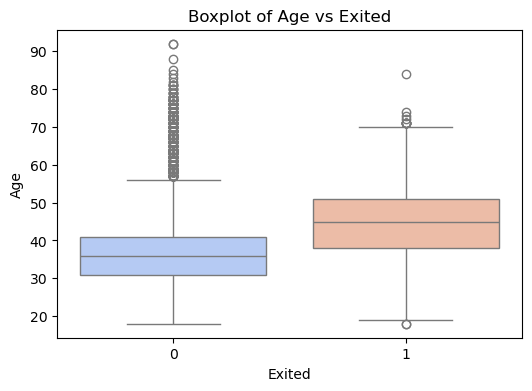

C:\Users\Gurudeep\AppData\Local\Temp\ipykernel_16968\3400763653.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=col, data=df, palette='coolwarm')


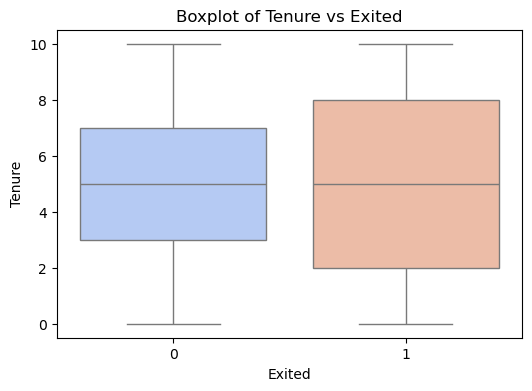

C:\Users\Gurudeep\AppData\Local\Temp\ipykernel_16968\3400763653.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=col, data=df, palette='coolwarm')


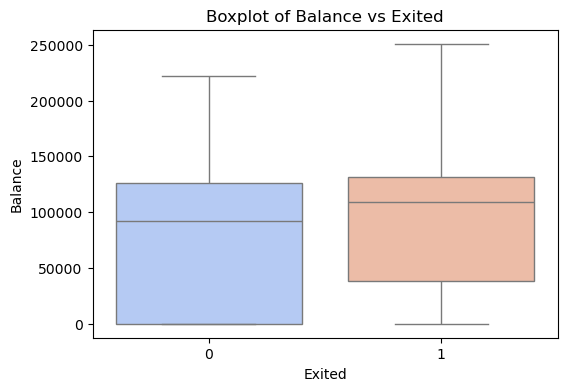

C:\Users\Gurudeep\AppData\Local\Temp\ipykernel_16968\3400763653.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=col, data=df, palette='coolwarm')


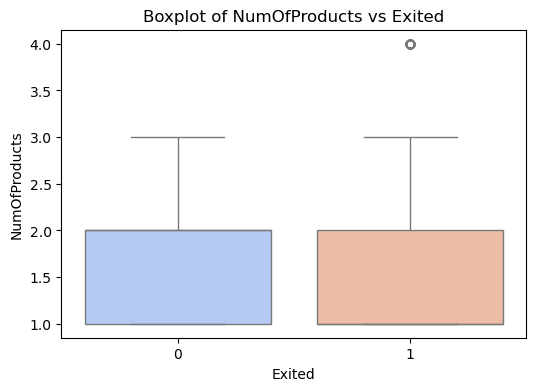

C:\Users\Gurudeep\AppData\Local\Temp\ipykernel_16968\3400763653.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=col, data=df, palette='coolwarm')


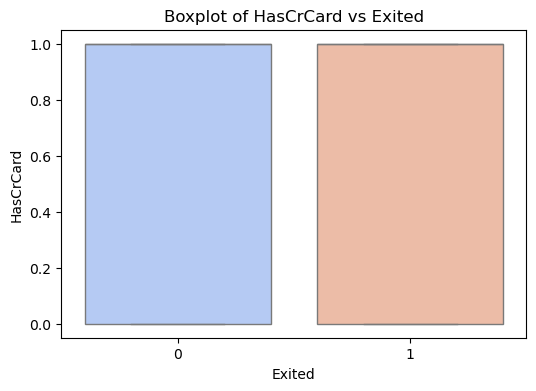

C:\Users\Gurudeep\AppData\Local\Temp\ipykernel_16968\3400763653.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=col, data=df, palette='coolwarm')


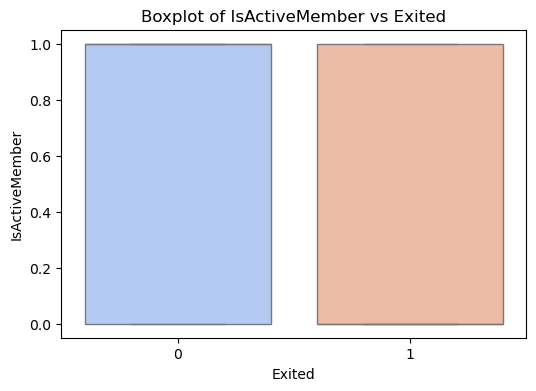

C:\Users\Gurudeep\AppData\Local\Temp\ipykernel_16968\3400763653.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=col, data=df, palette='coolwarm')


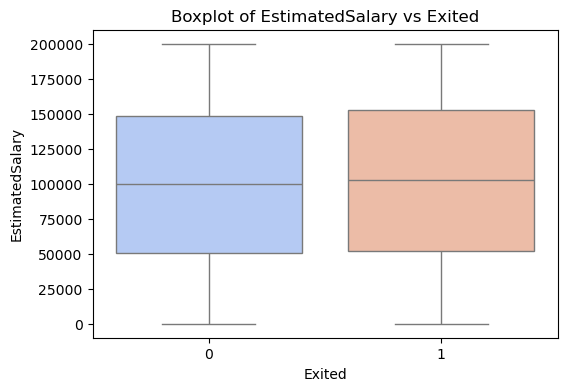

C:\Users\Gurudeep\AppData\Local\Temp\ipykernel_16968\3400763653.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y=col, data=df, palette='coolwarm')


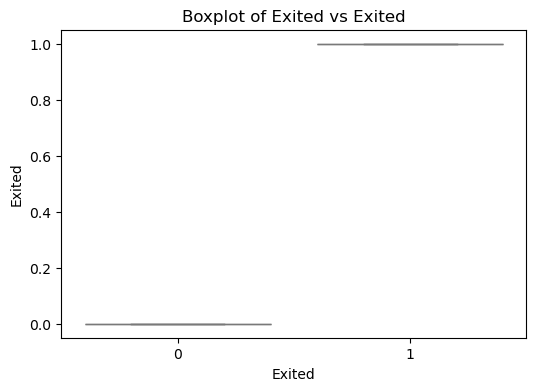

In [33]:
# Boxplots for numeric features vs. target variable
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Exited', y=col, data=df, palette='coolwarm')
    plt.title(f'Boxplot of {col} vs Exited')
    plt.show()


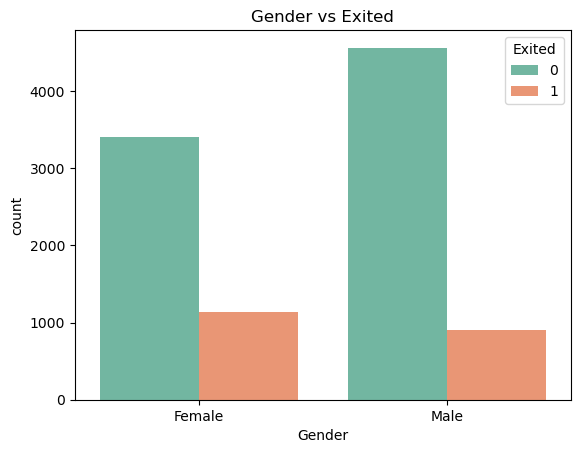

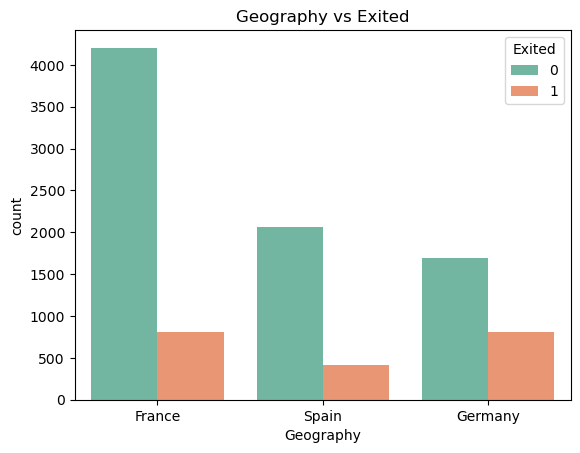

In [34]:
# Count plots for categorical variables vs target
sns.countplot(x='Gender', hue='Exited', data=df, palette='Set2')
plt.title('Gender vs Exited')
plt.show()

sns.countplot(x='Geography', hue='Exited', data=df, palette='Set2')
plt.title('Geography vs Exited')
plt.show()


In [35]:
# Dataset overview
print(df.head())
print("\nDataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nBasic Statistics:\n", df.describe())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [36]:
# Drop irrelevant columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [37]:
# Encode 'Gender' and 'Geography'
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)  # Avoid dummy variable trap



In [38]:
X = df.drop('Exited', axis=1)   # Features
y = df['Exited']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# 8. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# 9. Modeling
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# 10. Evaluation
y_pred = model.predict(X_test)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy Score: 0.8665

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



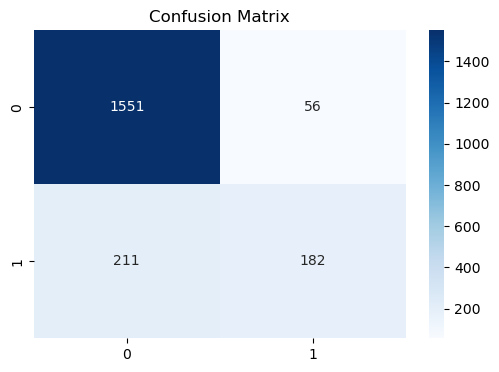

In [43]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [44]:
# 11. Save Model
with open('churn_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Also save the scaler (important for streamlit app)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("✅ Model and Scaler saved successfully!")

✅ Model and Scaler saved successfully!
